In [3]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
credit=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')

# Data Preprossing

In [60]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [55]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [61]:
movies = movies[['title','vote_average','vote_count','popularity','id']]
movies

,title,vote_average,vote_count,popularity,id
0,Avatar,7.2,11800,150.437577,19995
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,285
2,Spectre,6.3,4466,107.376788,206647
3,The Dark Knight Rises,7.6,9106,112.312950,49026
4,John Carter,6.1,2124,43.926995,49529
...,...,...,...,...,...
4798,El Mariachi,6.6,238,14.269792,9367
4799,Newlyweds,5.9,5,0.642552,72766
4800,"Signed, Sealed, Delivered",7.0,6,1.444476,231617
4801,Shanghai Calling,5.7,7,0.857008,126186


In [62]:
print(f'Shape of Credit dataset: {credit.shape }')
print(f'Shape of Movies dataset: {movies.shape}')

Shape of Credit dataset: (4803, 4)
Shape of Movies dataset: (4803, 5)


In [63]:
# Information about each column in Data

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4803 non-null   object 
 1   vote_average  4803 non-null   float64
 2   vote_count    4803 non-null   int64  
 3   popularity    4803 non-null   float64
 4   id            4803 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 187.7+ KB


In [64]:
# checking duplicates

movies.duplicated().sum()

0

In [65]:
# checking missing values

movies.isna().sum()

title           0
vote_average    0
vote_count      0
popularity      0
id              0
dtype: int64

In [66]:
# statistical detail about the numerical column

movies.describe()

# we can see highest vote is 10 and minimum is 0

,vote_average,vote_count,popularity,id
count,4803.000000,4803.000000,4803.000000,4803.000000
mean,6.092172,690.217989,21.492301,57165.484281
std,1.194612,1234.585891,31.816650,88694.614033
min,0.000000,0.000000,0.000000,5.000000
25%,5.600000,54.000000,4.668070,9014.500000
50%,6.200000,235.000000,12.921594,14629.000000
75%,6.800000,737.000000,28.313505,58610.500000
max,10.000000,13752.000000,875.581305,459488.000000


In [67]:
movies['vote_average'].unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [68]:
# Top 10 popular movies

popular_movies=movies.sort_values(ascending=False, by='popularity').head(10)
popular_movies

,title,vote_average,vote_count,popularity,id
546,Minions,6.4,4571,875.581305,211672
95,Interstellar,8.1,10867,724.247784,157336
788,Deadpool,7.4,10995,514.569956,293660
94,Guardians of the Galaxy,7.9,9742,481.098624,118340
127,Mad Max: Fury Road,7.2,9427,434.278564,76341
28,Jurassic World,6.5,8662,418.708552,135397
199,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,271.972889,22
82,Dawn of the Planet of the Apes,7.3,4410,243.791743,119450
200,The Hunger Games: Mockingjay - Part 1,6.6,5584,206.227151,131631
88,Big Hero 6,7.8,6135,203.734590,177572


In [69]:
# Top 10 most voted movies

highest_voted__movies=movies.sort_values(ascending=False, by='vote_count').head(10)
highest_voted__movies

,title,vote_average,vote_count,popularity,id
96,Inception,8.1,13752,167.583710,27205
65,The Dark Knight,8.2,12002,187.322927,155
0,Avatar,7.2,11800,150.437577,19995
16,The Avengers,7.4,11776,144.448633,24428
788,Deadpool,7.4,10995,514.569956,293660
95,Interstellar,8.1,10867,724.247784,157336
287,Django Unchained,7.8,10099,82.121691,68718
94,Guardians of the Galaxy,7.9,9742,481.098624,118340
426,The Hunger Games,6.9,9455,68.550698,70160
127,Mad Max: Fury Road,7.2,9427,434.278564,76341


# Data Visualization

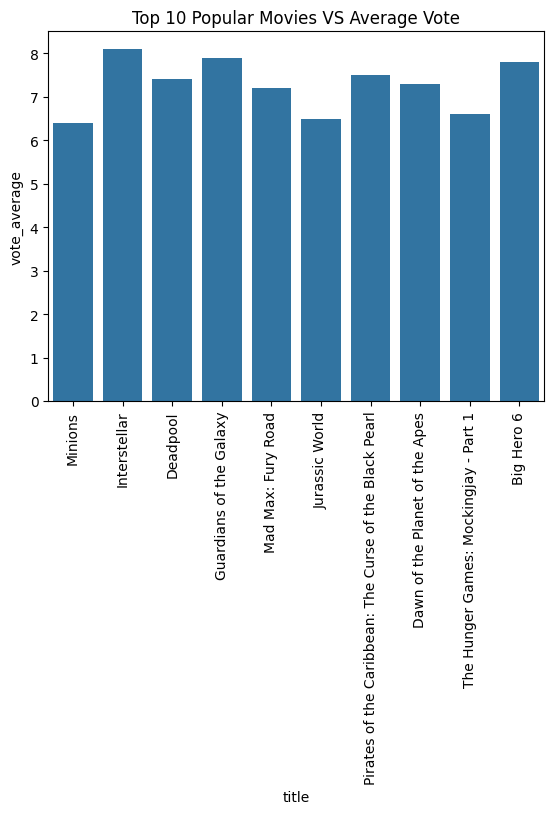

In [70]:
sns.barplot(x=popular_movies['title'],y=popular_movies['vote_average'])
plt.title('Top 10 Popular Movies VS Average Vote')
plt.xticks(rotation=90)
plt.show()


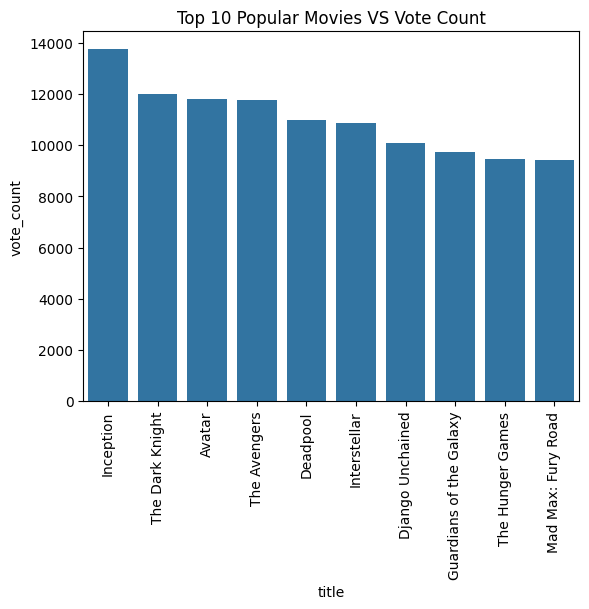

In [71]:
sns.barplot(x=highest_voted__movies['title'],y=highest_voted__movies['vote_count'])
plt.title('Top 10 Popular Movies VS Vote Count')
plt.xticks(rotation=90)
plt.show()


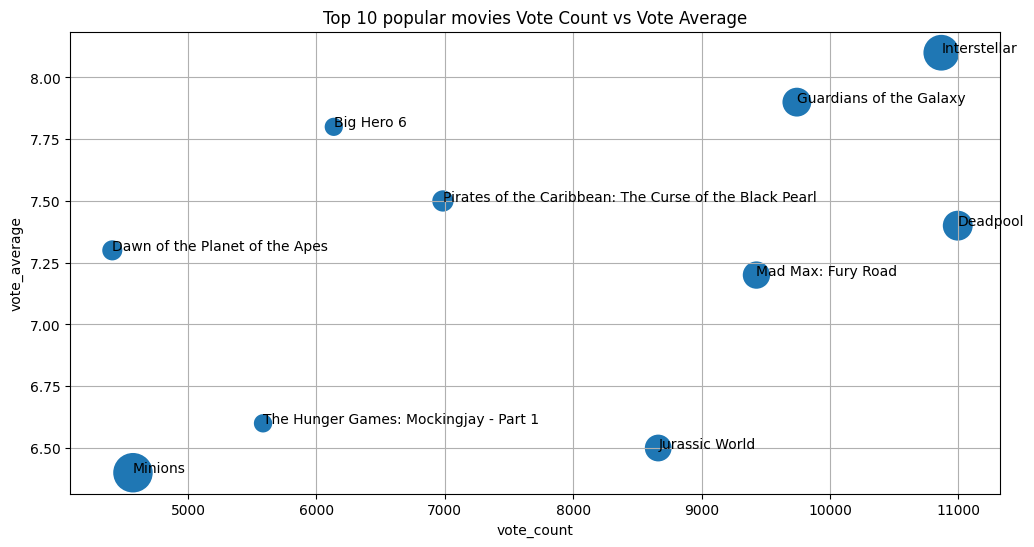

In [72]:
# Top 10 popular movies relation with vote_count and vote_average
plt.figure(figsize=(12,6))
sns.scatterplot(x=popular_movies['vote_count'],y=popular_movies['vote_average'],s=popular_movies['popularity'])
plt.title('Top 10 popular movies Vote Count vs Vote Average')

for i in range(len(popular_movies)):
    plt.text(popular_movies['vote_count'].values[i], popular_movies['vote_average'].values[i],popular_movies['title'].values[i])
plt.grid()
plt.show()


<Axes: xlabel='vote_count', ylabel='vote_average'>

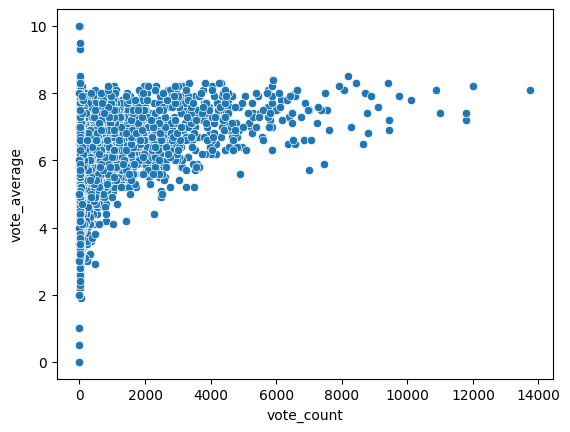

In [73]:
sns.scatterplot(x=movies['vote_count'],y=movies['vote_average'])

# from the below graph we can see that there are lot of users who didn't vote or voted 0

# Collaborative filtering

In [74]:
movies.head()

,title,vote_average,vote_count,popularity,id
0,Avatar,7.2,11800,150.437577,19995
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,285
2,Spectre,6.3,4466,107.376788,206647
3,The Dark Knight Rises,7.6,9106,112.312950,49026
4,John Carter,6.1,2124,43.926995,49529


In [75]:
pt=pd.pivot_table(movies,values='vote_average',index='title',columns='vote_count')
pt.fillna(0, inplace=True)
pt

vote_count,0,1,2,3,4,5,6,7,8,9,...,9427,9455,9742,10099,10867,10995,11776,11800,12002,13752
title,,,,,,,,,,,,,,,,,,,,,
#Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in a Madhouse,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[REC]²,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# finding similiarty between each movies rating vectors

similarity = cosine_similarity(pt)

In [77]:
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [83]:
new_pt=pt.reset_index()
new_pt
#id=new_pt[new_pt['title'].str.contains('#Horror')].index[0]

vote_count,title,0,1,2,3,4,5,6,7,8,...,9427,9455,9742,10099,10867,10995,11776,11800,12002,13752
0,#Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(500) Days of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10 Days in a Madhouse,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,[REC]²,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,eXistenZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,xXx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,xXx: State of the Union,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
new_pt=movies.merge(new_pt, on='title')

In [86]:
new_pt

,title,vote_average,vote_count,popularity,id,0,1,2,3,4,...,9427,9455,9742,10099,10867,10995,11776,11800,12002,13752
0,Avatar,7.2,11800,150.437577,19995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,285,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Spectre,6.3,4466,107.376788,206647,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Dark Knight Rises,7.6,9106,112.312950,49026,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John Carter,6.1,2124,43.926995,49529,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,6.6,238,14.269792,9367,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,Newlyweds,5.9,5,0.642552,72766,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,"Signed, Sealed, Delivered",7.0,6,1.444476,231617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,Shanghai Calling,5.7,7,0.857008,126186,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#items=sorted(list(enumerate(similarity[id])),reverse=True, key=lambda x:x[1])[0:10]

In [88]:
#items

In [27]:
#for i in items:
    #print(new_pt['title'].iloc[i[0]])

In [89]:
def movie_recommendation(Movie_Name):
    Movie_Name=Movie_Name.capitalize()
    movie_list=pd.DataFrame({'Movies_Name':[],'Popularity':[]})
    id=new_pt[new_pt['title'].str.contains(Movie_Name)].index[0]
    items=sorted(list(enumerate(similarity[id])),reverse=True, key=lambda x:x[1])[0:10]
    for i in items:
        temp_list=pd.DataFrame({'Movies_Name':[new_pt['title'][i[0]]],'Popularity':[new_pt['popularity'][i[0]]]})
        temp_list['Popularity'] = temp_list['Popularity'].astype(float)
        temp_list['Popularity'] = temp_list['Popularity'].round(2)
        movie_list=pd.concat([movie_list,temp_list],axis=0,ignore_index=True)
        #print(new_pt['title'][i[0]])
    return movie_list

In [90]:
new_pt[new_pt['title'].str.contains('Spider')].index[0]

5

In [48]:
app = gr.Interface(fn=movie_recommendation, inputs='text', outputs='text', description='Enter movie name to get Movie Recommendation', title='Movie Recommendation')
app.launch()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


ERROR:    Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 641, in run_until_complete
    self.run_forever()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever
    self._run_once()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 189

In [49]:
import pickle

In [91]:
pickle.dump(new_pt.to_dict(),open('movies.pkl','wb'))

In [135]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [133]:
import json
import requests
def get_poster(id):
    poster_list=[]
    for i in id:
        print(i)
        resposne = requests.get(f'https://api.themoviedb.org/3/movie/{i}?api_key=abd852ac04b170c5fd5e1b376536a632')
        data=resposne.json()
        poster_list.append('https://image.tmdb.org/t/p/original/'+data['poster_path'])
    return poster_list

In [134]:
get_poster([19995,49026])

19995
49026


['https://image.tmdb.org/t/p/original//kyeqWdyUXW608qlYkRqosgbbJyK.jpg',
 'https://image.tmdb.org/t/p/original//hr0L2aueqlP2BYUblTTjmtn0hw4.jpg']